In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from fractions import Fraction as frac
from sklearn import datasets
import sys

In [2]:
iris = datasets.load_iris()
X = iris["data"]
name_tarjet=iris.target_names
name_features=iris.feature_names
# print(name_features)
X=X[:,2] 
y = (iris["target"] == 0).astype(int) #return 1 if Iris setosa, else 0.

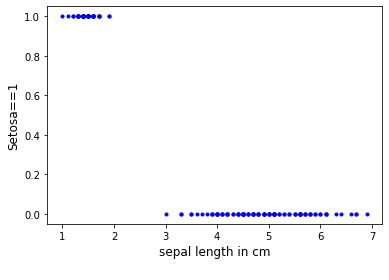

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, y, 'b.')
ax.set_xlabel('sepal length in cm\n',fontsize=12)
ax.set_ylabel('Setosa==1',fontsize=12);

[[-5.05117729]
 [-8.21677077]]


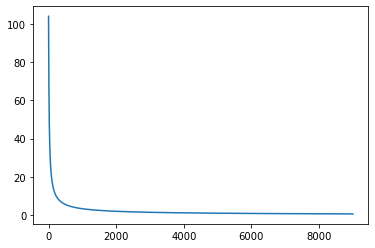

In [4]:
theta = np.array([[0],[0]])
ep=1e-4
lr =1e-3
n_iter = 9000
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(X),1)),X]

#Standardization by z-score
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std

j_cost=np.zeros([n_iter])
for it in range(n_iter):
    #Gradient
    pred = 1/(1+np.exp(-np.dot(x_bs,theta)))
    si=-lr*(x_bs.T.dot((pred - y)))
    theta = theta + si
    j_cost[it]=- np.sum(y*np.log(pred)+ ((1-y)*np.log(1-pred)))
plt.plot(j_cost)
print(theta)


Text(0, 0.5, 'setosa==1')

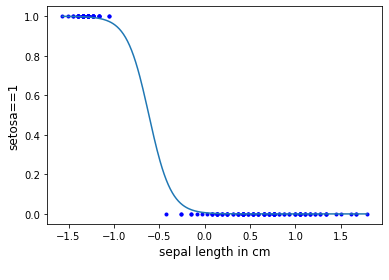

In [5]:
x=np.linspace(np.min(x_bs[:,1]),np.max(x_bs[:,1]),300)
x= np.c_[np.ones((len(x),1)),x]
sig=1/(1+np.exp(-np.dot(x,theta)))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_bs[:,1], y, 'b.')
ax.plot(x[:,1],sig)
ax.set_xlabel('sepal length in cm\n',fontsize=12)
ax.set_ylabel('setosa==1',fontsize=12)

In [6]:
#evalación 
sig=1/(1+np.exp(-np.dot(x_bs,theta)))
sig=np.round(sig)
error=np.sum(np.abs(sig-y))
accuracy=((len(y)-error)/len(y))*100
print("accuracy = %f " % accuracy)

accuracy = 100.000000 
